In [11]:
import ipywidgets as widgets
from IPython import display as display
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def create_button():
  button = widgets.Button(
  description='Siguente Iteracion',
  disabled=False,
  button_style='info',
  tooltip='Siguiente iteracion',
  icon='check'
  )
  return button

def graficar_aptitudes(aptitudes, global_mejor):
  paletaColores = np.array(['#f2190e','#f68a04','#ffde00','#ff00d6','#cb00ff','#a7ff00','#5600ff','#00ff68','#00c0ff','#00ffc9','#f2190e','#f68a04','#ffde00','#ff00d6','#cb00ff','#a7ff00','#5600ff','#00ff68','#00c0ff','#00ffc9'])
  for i in range(0, len(aptitudes)):
    if rastrigin(global_mejor) == aptitudes[i]:
      plt.plot(i+1,aptitudes[i],'r*',markersize=15)
    else: 
      plt.scatter(i+1, aptitudes[i], c= paletaColores[i])
  plt.xlabel('N* Particula')
  plt.xlabel('Aptitud')
  plt.ylim(0, np.sort(aptitudes)[-1]+1)
  

# ***Function Rastrigin ***

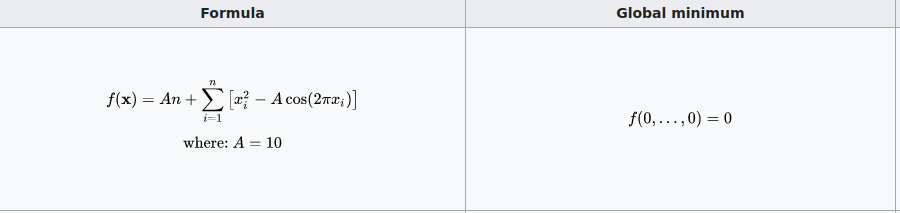


In [12]:
# Definiendo las funciones.
# Rastrigin en 4 dimensiones
def rastrigin(x:list):
  y = 0
  A = 10
  for xi in x:
    y += (xi**2)-(A*math.cos(2*math.pi*xi))
  y += A*4
  return y


Iteracion-> 41 
Mejor Particula en posicion ->  [-0.02307974 -2.94292516 -1.94590147  1.96384951] 
Valor de aptitud ->  17.87470382324492
         D1        D2        D3        D4    Aptitud
0 -0.068337 -2.737639 -1.916906  2.103887  30.671878
1 -0.053170 -2.900905 -2.771255  2.056983  32.061096
2  0.914251 -3.056076  0.181789  3.007686  27.141484
3 -0.043110 -2.913283 -1.944681  1.988341  18.661797
4 -0.022103 -2.903633 -1.993414  1.993036  18.269649
5  0.015599 -2.048516 -2.926338  2.914068  24.235540
6 -0.076532 -3.015286 -2.099078  1.984242  20.546192
7  0.850402 -2.976649 -1.917684  2.087904  24.624497
8 -0.023080 -2.942925 -1.945901  1.963850  17.874704
9  0.002267 -2.839740 -2.223984  2.047410  30.671723


Button(button_style='info', description='Siguente Iteracion', icon='check', style=ButtonStyle(), tooltip='Sigu…

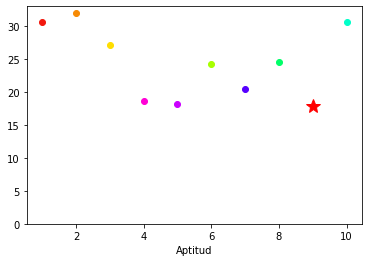

In [13]:
# Se define el espacio de busqueda
limiteInferior = -5.12
limiteSuperior = 5.12

# Se declara el numero de particulas y sus dimensiones. 
particulas = 10
dimensiones = 4

# Se genera el enjambre y sus velocidades de forma aleatoria.
enjambre = limiteInferior + (limiteSuperior - limiteInferior) * np.random.rand(particulas, dimensiones) 
velocidades = -(limiteSuperior - limiteInferior)/2+(limiteSuperior - limiteInferior)*np.random.rand(particulas, dimensiones)

# Inicializamos los valores de nuestra funcion objetivo, comenzando desde el peor de los casos. 
# Debido a que estamos solucionando un problema de minimizacion el peor caso en el +infinito. :O
aptitud_global = np.inf
aptitud_local = np.inf * np.ones(particulas)


individuo_global = 1*enjambre[0]
enjambre_local =1*enjambre

# Se busca el individuo con la mejor aptitud antes de la primera iteracion

for i in range(0,particulas):
  aptitud_local[i] = rastrigin(enjambre_local[i])
  if rastrigin(enjambre_local[i]) < rastrigin(individuo_global):
    individuo_global = enjambre_local[i]

print('=====ESTADO DE INICIALIZACION=====')
df = pd.DataFrame(enjambre_local, columns=['D1', 'D2', 'D3', 'D4'])
df['Aptitud'] = aptitud_local
print(df.head(10))
iteracion = 0

print('\nIteracion->',str(iteracion), '\nMejor Particula en posicion -> ',str(individuo_global), '\nValor de aptitud -> ',str(rastrigin(individuo_global)))

peso = 0.8

coef_individual = 0.3
coef_lider = 0.7

def iterar(a):
  global iteracion
  global peso, coef_individual, coef_lider
  global enjambre, velocidades, individuo_global, enjambre_local
  global aptitud_local

  display.clear_output(wait=True)
  
  iteracion += 1
  # Mover la particula. 
  for  i in range(0,particulas):
    for j in range(0,dimensiones):
      R1 = np.random.rand()
      R2 = np.random.rand()
      velocidades[i][j] = (peso*velocidades[i][j] 
                           + coef_individual*R1*(enjambre_local[i][j] - enjambre[i][j]) 
                           + coef_lider*R2*(individuo_global[j] - enjambre[i][j]))
      enjambre[i][j] = enjambre[i][j] + velocidades[i][j]
    if rastrigin(enjambre[i]) < rastrigin(enjambre_local[i]):
      enjambre_local[i] = enjambre[i]
      if rastrigin(enjambre_local[i]) < rastrigin(individuo_global):
        individuo_global = enjambre_local[i]
  
  for i in range(0,particulas):
    aptitud_local[i] = rastrigin(enjambre_local[i])
  print('\nIteracion->',str(iteracion), '\nMejor Particula en posicion -> ',str(individuo_global), '\nValor de aptitud -> ',str(rastrigin(individuo_global)))
  df = pd.DataFrame(enjambre_local, columns=['D1', 'D2', 'D3', 'D4'])
  df['Aptitud'] = aptitud_local
  print(df.head(10))
  display.display(button)
  graficar_aptitudes(aptitud_local, individuo_global) 

  
global_fig = plt.figure()
ax = plt.axes()

button=create_button()
button.on_click(iterar)
display.display(button)


graficar_aptitudes(aptitud_local, individuo_global)